# Einschaltvorgang am Kondensator

Betrachtet wird der Einschaltvorgang an einem Kondensator.

![Einschaltvorgang_am_Kondensator](Einschaltvorgang_am_Kondensator.png)

Der Kondensator ist zum Zeitpunkt $t = 0$ ungeladen. Die Bauteilwerte betragen

$$U_0 = 2 \text{ V} \quad R = 1 \Omega \quad C = 1 \text{ mF}$$

Der Kondensatorstrom berechnet sich aus

$$i(t) = C \cdot \frac{d}{dt}u_C(t) = C \cdot \dot{u}_C(t) \quad \text{und} \quad i(t) = \frac{U_0 - u_C(t)}{R}$$

Daraus ergibt sich folgende Differentialgleichung

$$RC \cdot \dot{u}_C(t) + u_C(t) = U_0$$

Diese Differentialgleichung soll mit dem ode45-Verfahren gelöst werden. Gehen Sie dazu folgendermaßen vor:

1. Vervollständigen Sie die Funktion `fcn_uCpunkt()`, die die erste Ableitung der Kondensatorspannung $\dot{u}_C(t)$ in Abhängigkeit der Zeit und der Kondensatorspannung $u_C(t)$ berechnet. Verwenden Sie zur Berechnung die oben angegebene Differentialgleichung.

2. Vervollständigen Sie die Funktion ode45(), damit die Lösung der Differentialgleichung im Bereich $0 \ldots 5$ ms berechnet wird und die initiale Kondensatorspannung $u_C(t = 0) = 0$ V beträgt.

3. Plotten Sie das Ergebnis der Kondensatorspannung $u_C(t)$.

4. Berechnen Sie die analytische Lösung der Differentialgleichung und legen Sie diese in der Variable `uC_analytisch` ab.

5. Plotten und vergleichen Sie die analytische Lösung mit der numerischen Lösung.

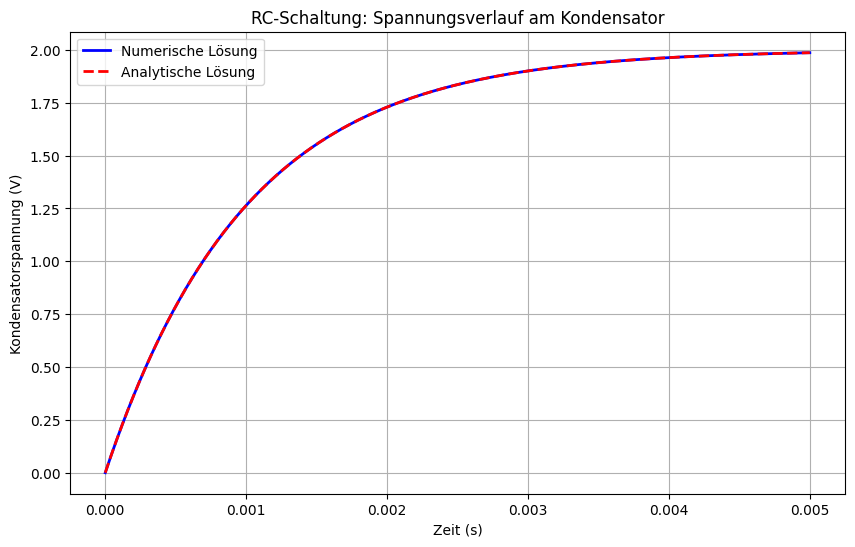

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def fcn_uCpunkt(t, uC, U0, R, C):
    """Berechnung der Spannungsänderungsrate am Kondensator"""
    return (U0 - uC) / (R * C)

# Parameter
U0 = 2    # Quellenspannung 2V
R = 1     # Widerstand 1Ω
C = 1e-3  # Kapazität 1mF

# Numerische Lösung mit ODE-Solver (erhöhte Genauigkeit)
solution = solve_ivp(
    lambda t, uC: fcn_uCpunkt(t, uC, U0, R, C),
    [0, 5e-3],          # Zeitintervall
    [0],                # Anfangswert: Kondensatorspannung = 0V
    method='RK45',      # Runge-Kutta-Verfahren 4. Ordnung
    rtol=1e-8,          # Relative Toleranz (erhöht)
    atol=1e-10,         # Absolute Toleranz (erhöht)
    max_step=1e-5,      # Kleinere maximale Schrittweite
    dense_output=True   # Für glatte Ausgabe
)

# Für glattere Kurve, mehr Zeitpunkte auswerten
t_smooth = np.linspace(0, 5e-3, 1000)
uC_solution = solution.sol(t_smooth)[0]

# Analytische Lösung
uC_analytisch = U0 * (1 - np.exp(-t_smooth/(R*C)))

# Grafische Darstellung
plt.figure(figsize=(10, 6))
plt.plot(t_smooth, uC_solution, 'b-', linewidth=2, label='Numerische Lösung')
plt.plot(t_smooth, uC_analytisch, 'r--', linewidth=2, label='Analytische Lösung')
plt.legend()
plt.grid(True)
plt.xlabel('Zeit (s)')
plt.ylabel('Kondensatorspannung (V)')
plt.title('RC-Schaltung: Spannungsverlauf am Kondensator')
plt.show()